<a href="https://colab.research.google.com/github/taikiishii98/learnAiByUdemy/blob/main/importExternalData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

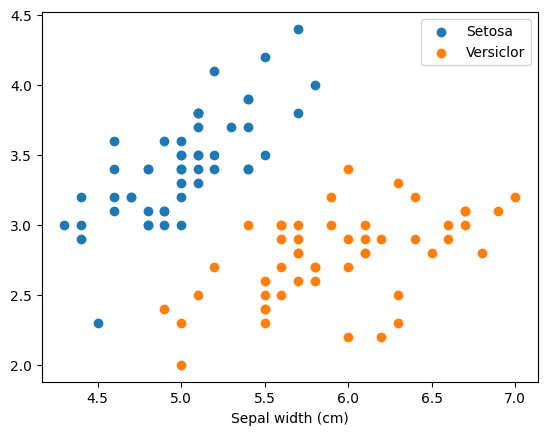

In [ ]:
#外部データの導入
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

#Irisデータの読み込み
iris = datasets.load_iris()

#各花のサイズ
iris_data = iris.data
#print(iris_data)
#print(iris_data.shape)

#散布図で表示
st_data = iris_data[:50] #Setosa (品種)
vc_data = iris_data[50:100] #Vesicolor (品種)
plt.scatter(st_data[:, 0], st_data[:, 1], label="Setosa") #すべての行 (:) の0列目及び1列目をプロット
plt.scatter(vc_data[:, 0], vc_data[:, 1], label="Versiclor")
plt.legend()

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.show()

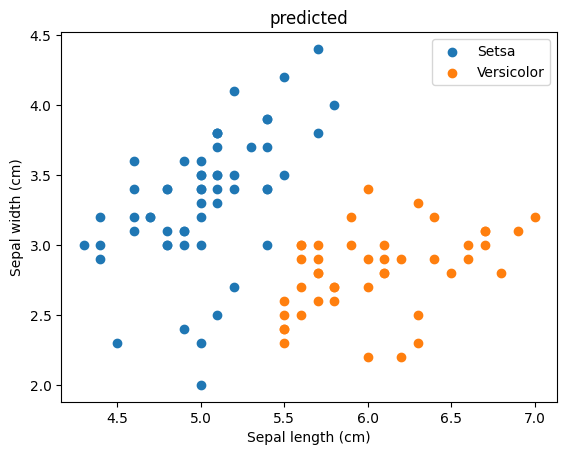

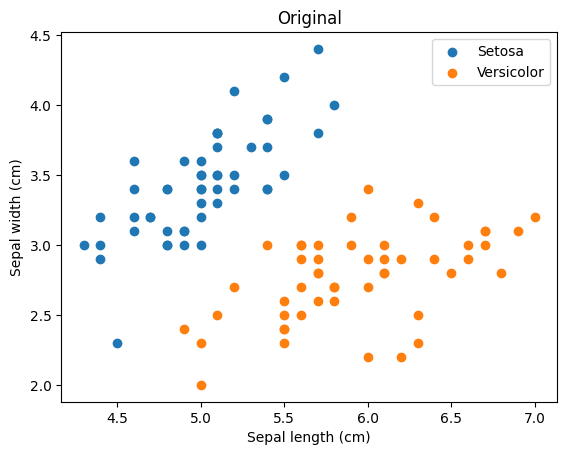

In [20]:
#外部データの導入
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

#Irisデータの読み込み
iris = datasets.load_iris()
#各花のサイズ
iris_data = iris.data
sl_data = iris_data[:100, 0].copy()
sw_data = iris_data[:100, 1].copy()

#平均値を0に (ニューラルの入力値は正負のバラつきがないのが好ましいため)
sl_ave = np.average(sl_data)
sl_data -= sl_ave
sw_ave = np.average(sw_data)
sw_data -= sw_ave

input_data = []
for i in range(100):
  input_data.append([sl_data[i], sw_data[i]])

def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))

#ニューロン
class Neuron:
  def __init__(self):
    self.input_sum =0.0
    self.output = 0.0

  def set_input(self, inp):
    self.input_sum += inp

  def get_output(self):
   self.output = sigmoid(self.input_sum)
   return self.output

  def reset(self):
    self.input_sum = 0
    self.output = 0

#ニューラルネットワーク
class NeuralNetwork:
  def __init__(self):
    self.neuron = Neuron()
    self.w = [0.5, -0.2]
    self.bias = 0.0

  def commit(self, input_data):
    self.neuron.reset()

    self.neuron.set_input(input_data[0] * self.w[0])
    self.neuron.set_input(input_data[1] * self.w[1])
    self.neuron.set_input(self.bias)
    return self.neuron.get_output()

  #ニューラルネットワークのインスタンス
neural_network = NeuralNetwork()

  #実行
st_predicted=[[], []] #Setosa
vc_predicted=[[], []] #Versicolor
for data in input_data:
  if neural_network.commit(data) < 0.5:
    st_predicted[0].append(data[0] + sl_ave)
    st_predicted[1].append(data[1] + sw_ave)
  else:
    vc_predicted[0].append(data[0] + sl_ave)
    vc_predicted[1].append(data[1] + sw_ave)

#分類結果を散布図で表示
plt.scatter(st_predicted[0], st_predicted[1], label = "Setsa")
plt.scatter(vc_predicted[0], vc_predicted[1], label = "Versicolor")
plt.legend()

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("predicted")
plt.show()

# 比較用に元の分類を散布図で表示
st_data = iris_data[:50]  # Setosa
vc_data = iris_data[50:100]  # Versicolor
plt.scatter(st_data[:, 0], st_data[:, 1], label="Setosa")
plt.scatter(vc_data[:, 0], vc_data[:, 1], label="Versicolor")
plt.legend()

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Original")
plt.show()